In [9]:
import cv2
from forward import image_gen_emb_w
from utils import PSNR

In [10]:
image1 = cv2.imread("D:\\2023\\Tamper_Recover\\Data\\Lenna.png")
w_image1 = image_gen_emb_w(image1,137,17,19)
image2 = cv2.imread("D:\\2023\\Tamper_Recover\\Data\\airplane.png")
w_image2 = image_gen_emb_w(image2,137,17,19)
image3 = cv2.imread("D:\\2023\\Tamper_Recover\\Data\\Lake_original.png")
w_image3 = image_gen_emb_w(image3,137,17,19)
image4 = cv2.imread("D:\\2023\\Tamper_Recover\\Data\\peppers.png")
w_image4 = image_gen_emb_w(image4,137,17,19)
print("PSNR1",cv2.PSNR(image1,w_image1))
print("PSNR2",cv2.PSNR(image2,w_image2))
print("PSNR3",cv2.PSNR(image3,w_image3))
print("PSNR4",cv2.PSNR(image4,w_image4))

40.731709405126736
40.71193172223384
40.70279637006645
40.411433771166365
PSNR1 40.731709405126736
PSNR2 40.71193172223384
PSNR3 40.70279637006645
PSNR4 40.411433771166365


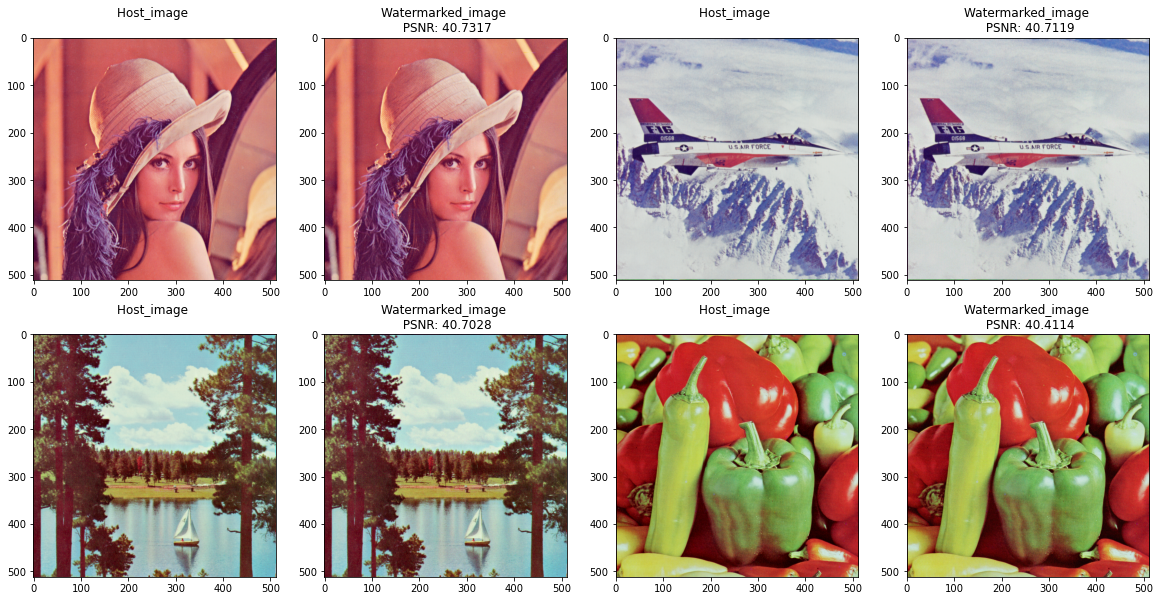

In [11]:
w_str1 = f'PSNR: {PSNR(image1,w_image1):.4f}'
w_str2 = f'PSNR: {PSNR(image2,w_image2):.4f}'
w_str3 = f'PSNR: {PSNR(image3,w_image3):.4f}'
w_str4 = f'PSNR: {PSNR(image4,w_image4):.4f}'
from matplotlib import pyplot as plt
fig, axes = plt.subplots(2, 4,figsize = (20,10))

axes[0,0].set_title('Host_image \n')
axes[0,1].set_title(f'Watermarked_image \n {w_str1}')
axes[0,0].imshow(cv2.cvtColor(image1,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[0,1].imshow(cv2.cvtColor(w_image1,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)

axes[0,2].set_title('Host_image \n')
axes[0,3].set_title(f'Watermarked_image \n {w_str2}')
axes[0,2].imshow(cv2.cvtColor(image2,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[0,3].imshow(cv2.cvtColor(w_image2,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)

axes[1,0].set_title('Host_image \n')
axes[1,1].set_title(f'Watermarked_image \n {w_str3}')
axes[1,0].imshow(cv2.cvtColor(image3,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1,1].imshow(cv2.cvtColor(w_image3,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)

axes[1,2].set_title('Host_image \n')
axes[1,3].set_title(f'Watermarked_image \n {w_str4}')
axes[1,2].imshow(cv2.cvtColor(image4,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1,3].imshow(cv2.cvtColor(w_image4,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)

In [12]:
import numpy as np

tamper_image = w_image1.copy()
tamper_image[:,256:,:]= np.zeros((512,256,3),dtype=np.uint8) 
# tamper_image[230:282,230:282,:]= np.zeros((52,52,3),dtype=np.uint8)

In [13]:
from detect import *
level_1BGR,_ = level_one_detection(tamper_image,137,17,19)
# detec_2 = level_two_detection(detec_1)
# detec_3 = level_three_detection(detec_2)

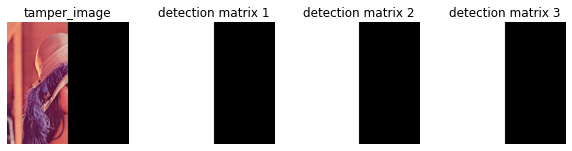

In [14]:
fig, axes = plt.subplots(1, 4,figsize = (10,10))
axes[0].set_axis_off()
axes[1].set_axis_off()
axes[2].set_axis_off()
axes[3].set_axis_off()

axes[0].set_title(f'tamper_image')
axes[1].set_title(f'detection matrix 1')
axes[2].set_title(f'detection matrix 2')
axes[3].set_title(f'detection matrix 3')

axes[0].imshow(cv2.cvtColor(tamper_image,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1].imshow(level_1BGR[:,:,0], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[2].imshow(level_1BGR[:,:,1], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[3].imshow(level_1BGR[:,:,2], cmap=plt.cm.gray,vmax=1,vmin=0)

In [24]:
tamper_image1 = w_image1.copy()
tamper_image1[256-81:256+81,256-81:256+81,:]= np.zeros((162,162,3),dtype=np.uint8) 

In [23]:
print(np.sqrt(512*512/10))
print(162/2)

161.90861620062103
81.0


In [26]:
level_1BGR1,_ = level_one_detection(tamper_image1,137,17,19)

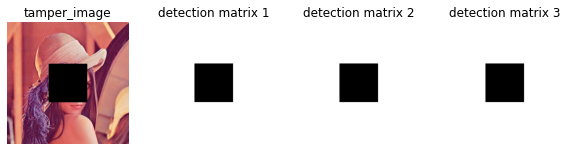

In [27]:
fig, axes = plt.subplots(1, 4,figsize = (10,10))
axes[0].set_axis_off()
axes[1].set_axis_off()
axes[2].set_axis_off()
axes[3].set_axis_off()

axes[0].set_title(f'tamper_image')
axes[1].set_title(f'detection matrix 1')
axes[2].set_title(f'detection matrix 2')
axes[3].set_title(f'detection matrix 3')

axes[0].imshow(cv2.cvtColor(tamper_image1,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1].imshow(level_1BGR1[:,:,0], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[2].imshow(level_1BGR1[:,:,1], cmap=plt.cm.gray,vmax=1,vmin=0)
axes[3].imshow(level_1BGR1[:,:,2], cmap=plt.cm.gray,vmax=1,vmin=0)